In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Data/FPL_tweets.csv', delimiter=',')

data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Year'] = data['Timestamp'].dt.year

In [3]:
data_with_hashtags = data.dropna(subset=['Hashtag'])

grouped_data = data_with_hashtags.groupby(['Year', 'Hashtag']).agg({
    'Likes': 'sum',
    'Replies': 'sum',
    'Retweets': 'sum'
}).reset_index()

grouped_data['Interaction_Count'] = grouped_data['Likes'] + grouped_data['Replies'] + grouped_data['Retweets']

top_hashtags_by_year = grouped_data.groupby('Year').apply(lambda x: x.nlargest(3, 'Interaction_Count')).reset_index(drop=True)

data['Interaction'] = data['Likes'] + data['Replies'] + data['Retweets']

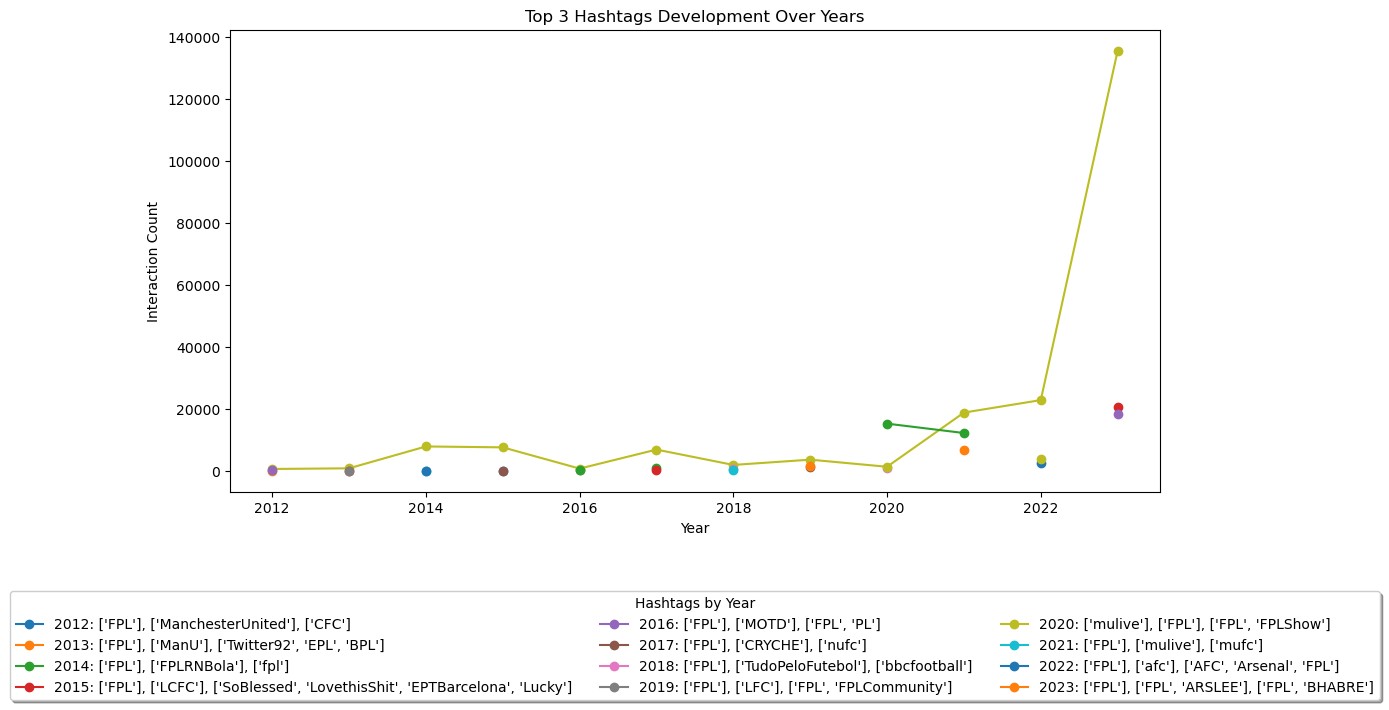

In [4]:
plt.figure(figsize=(12, 6))
for hashtag, group in top_hashtags_by_year.groupby('Hashtag'):
    plt.plot(group['Year'], group['Interaction_Count'], label=hashtag, marker='o')

legend_labels = []
for year, group in top_hashtags_by_year.groupby('Year'):
    hashtags = ", ".join(group["Hashtag"].tolist())
    legend_labels.append(f'{year}: {hashtags}')

plt.xlabel('Year')
plt.ylabel('Interaction Count')
plt.title('Top 3 Hashtags Development Over Years')
plt.legend(title='Hashtags by Year', labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=3)
plt.show()